# Семинар 10: Трансформеры

## Вступление
Большинство современных методов моделирования языков опираются на архитектуру Transformer: BERT, GPT и их производные. Трансформеры используют attention как основные строительные блоки, из которых они состоят. В последнюю пару лет применение архитектур, основанных на механизме внимания, пошло даже дальше естественных языков: Visual Transformer для картинок, Codex и ему подобные для программного кода. Помимо особенности в виде блоков внимания, трансформеры обычно используют и более продвинутую токенизацию — BPE. Поскольку этот тип моделей много лет (5 лет — это для дип лёрнинга много) является state-of-the-art решением для большого количества задач в самых разных областях, тулинг в этой области тоже продвинутый. Давайте разберёмся со всем этим. :)

Рекомендации для чтения:
1. [Оригинальная статья про Трансформер](https://arxiv.org/abs/1706.03762)
2. [Статья про BERT](https://arxiv.org/abs/1810.04805)
3. [Статья про GPT](https://s3-us-west-2.amazonaws.com/openai-assets/research-covers/language-unsupervised/language_understanding_paper.pdf)
4. [Блогпост про seq2seq и attention](https://lena-voita.github.io/nlp_course/seq2seq_and_attention.html#Subword%20Segmentation:%20Byte%20Pair%20Encoding)

### План семинара
1. Смотрим на разные примеры токенизации текста и повторяем архитектуру BERT
2. Изучаем библиотеки от HuggingFace
3. Применяем готовую модель средствами HuggingFace
4. Файнтюним модель из `transformers` на лайтнинге

## 1. Смотрим на разные примеры токенизации текста  и повторяем архитектуру BERT
Перед тем как обучать какую-либо модель, нам надо перевести текст в числа. Этот процесс называется векторизацией и делится на токенизацию и построение эмбеддингов. Про базовые подходы к токенизации мы с вами уже говорили: разбиение текста на отдельные символы, полиграммы символов или целые слова (тут можно накинуть знакомые нам стемминг и лемматизацию). Ну а про построение эмбеддингов мы обсуждали на примерах Word2Vec и FastText.

В трансформерах дело обстоит по-своему: в качестве токенизации применяется алгоритм byte-pair encoding (BPE), а построение эмбеддингов является частью самой модели.

Давайте посмотрим всё это на картинках.

### Токенизаторы

#### По символам

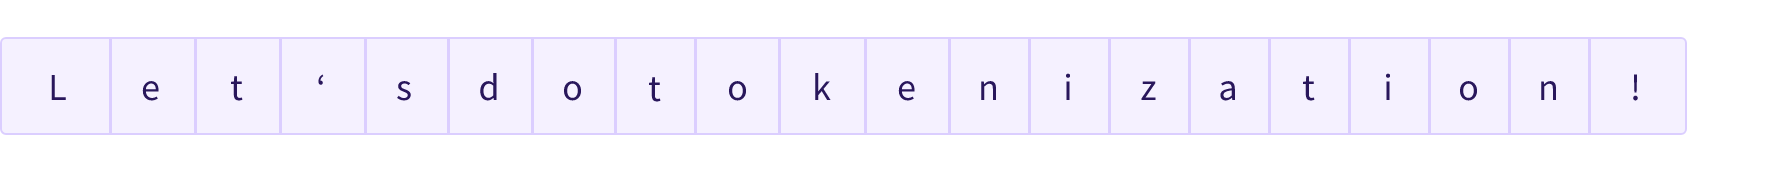

---
#### По словам
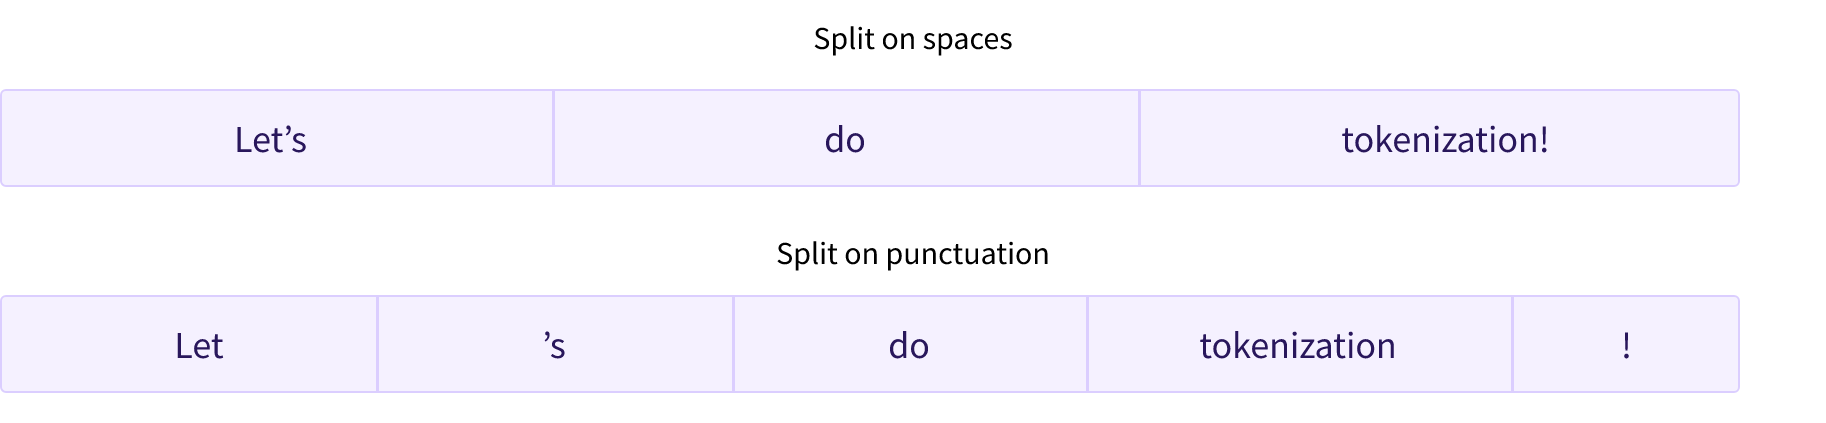

---
#### Byte-pair encoding
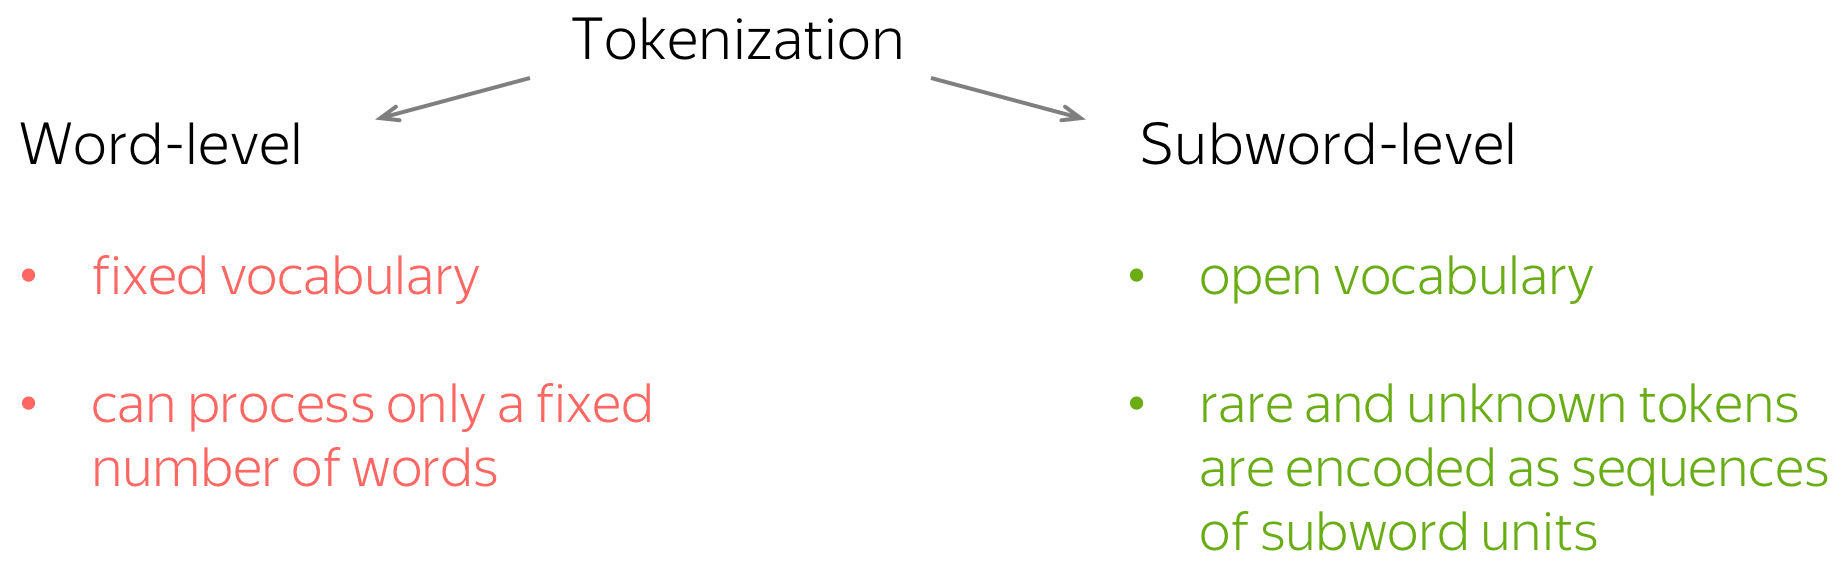

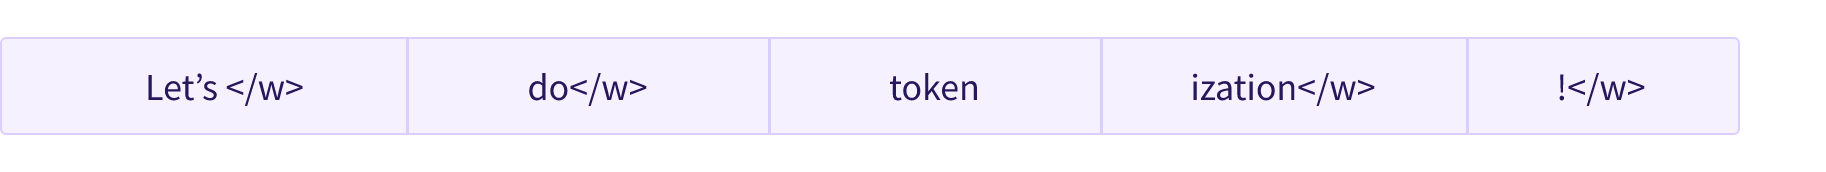

### BERT — Bidirectional Encoder Representations from Transformers

BERT — это нейронная сеть от Google, в 2017-2018 годах показавшая SOTA результаты на целом ряде задач. Эта модель очень активно применяется в различных продуктах, предполагающих обработку естественного языка: ответы на вопросы, заданные в произвольной форме; чат-боты; анализаторы грамматики и стиля текста; автоматические переводчики и многое другое. Основную роль в архитектуре играет self-attention.

#### Обычная архитектура Transformer

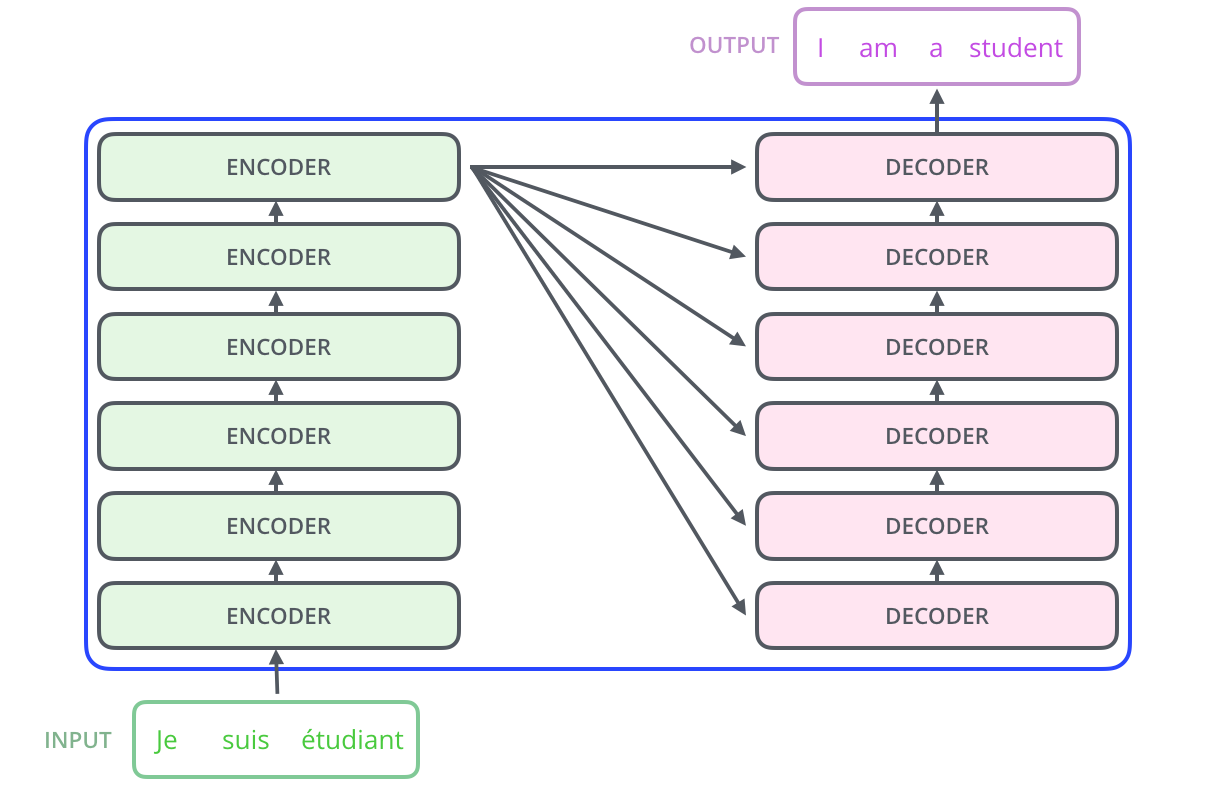

Все энкодеры идентичны по структуре и имеют разные веса. Каждый можно разделить на два подслоя:

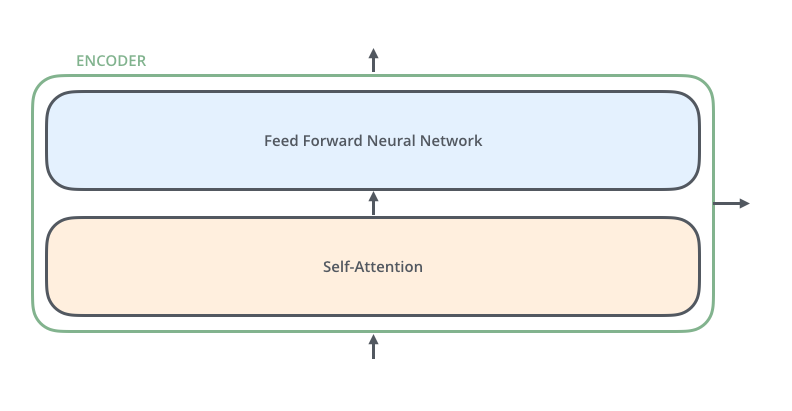

Декодер также содержит два этих слоя, но между ними есть слой внимания, который помогает декодеру фокусироваться на релевантных частях входящего предложения:

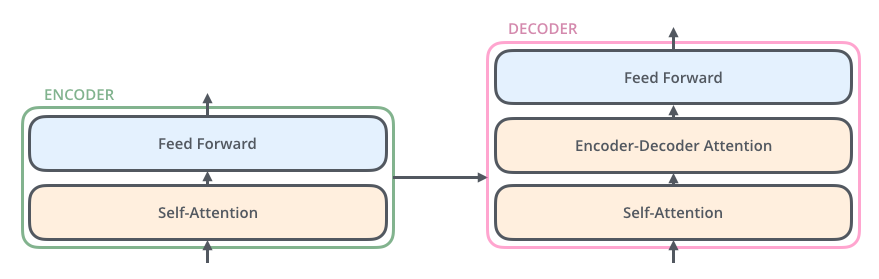


Кодировщик получает на вход и обрабатывает набор векторов, проводя их через слой внутреннего внимания и далее – через нейронную сеть прямого распространения, пока, наконец, не передает свой выход следующему кодировщику.

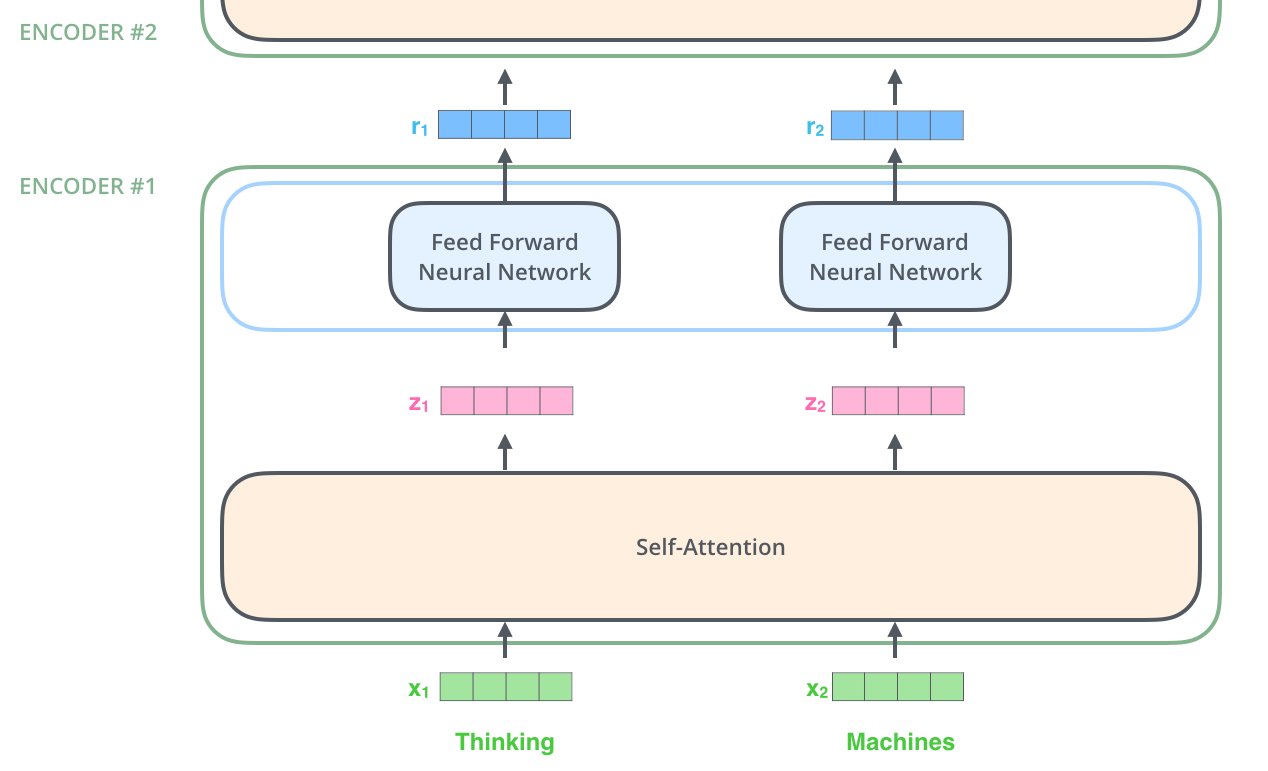

---
#### BERT
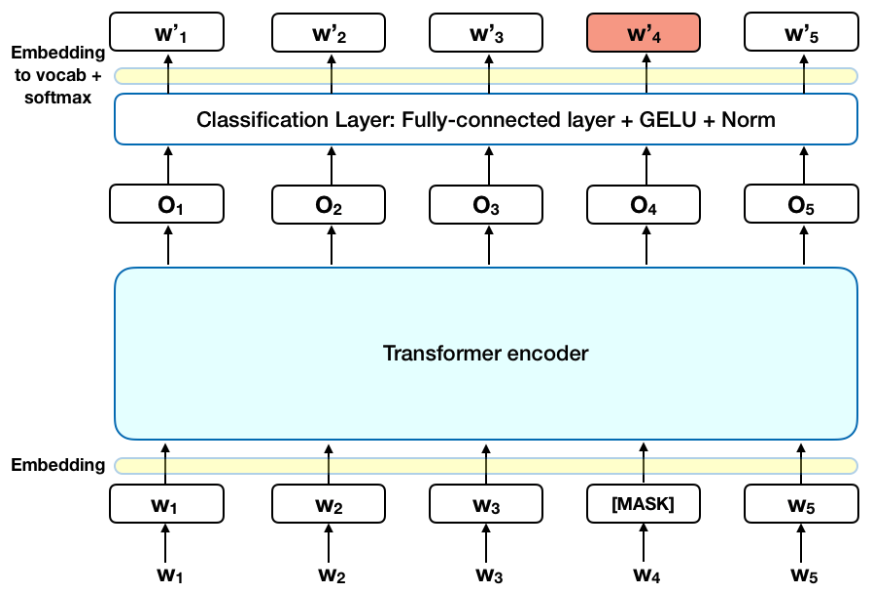

## 2. Изучаем библиотеки от HuggingFace
[HuggingFace](https://huggingface.co) — это своеобразный GitHub от мира глубинного обучения для NLP, который позволяет пользователям делиться своими моделями. На данный момент платформа содержит более 60k моделей (в том числе доступны предобученные тяжелые трансформеры) 6k наборов данных и 6k демонстрационных примеров.

Помимо хаба компания HuggingFace разрабатывает и поддерживает библиотеку `tranformers`, в которой есть много полезного: токенизаторы; имплементации множества различных трансформеров; обёртки датасетов и функционал для их скачивания; трейнер моделей (примерно как в лайтнинге). Эта библиотека позволяет в несколько строчек кода загружать и применять (или дообучать) предобученные модели. Чаще всего она используется в задачах обработки естественного языка, но также содержит в себе модели для работы с задачами компьютерного зрения, обработки аудио, видео и др. Список доступных моделей и поддерживаемых фреймворков можно найти на главной странице [документации](https://huggingface.co/docs/transformers/index).

И даже это не всё! HuggingFace разрабатывает и поддерживает библиотеку `datasets`, которая помогает работать с наборами данных для задач NLP, CV, обработки аудио. С ее помощью можно удобно и быстро изучить и подготовить набор данных для применения моделей глубинного обучения, а также получить доступ к стримингу данных (т.е. использованию без нагрузки на локальную машину). Последнее особенно полезно, если данных очень много, а доступных мощностей очень мало. Подробнее про библиотеку можно почитать в [документации](https://huggingface.co/docs/datasets/index).

Начнём с `transformers`. Давайте посмотрим на пример использования [BertTokenizer](hf.co/bert-base-cased):

In [1]:
import warnings

warnings.filterwarnings("ignore")

In [2]:
from transformers import BertTokenizer

# основной интерфейс загрузки модели / токенизатора:
tokenizer = BertTokenizer.from_pretrained("bert-base-cased")

# также модель / токенизатор можно выгрузить, указав соответствующую директорию:
# BertTokenizer.from_pretrained("/home/saved/my_awesome_tokenizer/")

# если вы что-то меняли, то модель / токенизатор можно сохранить аналогичным образом:
# tokenizer.save_pretrained("/home/saved/directory_on_my_computer")

tokenizer_config.json:   0%|          | 0.00/29.0 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/213k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/436k [00:00<?, ?B/s]

config.json:   0%|          | 0.00/570 [00:00<?, ?B/s]

In [3]:
print("Токенизируем: ", tokenizer.tokenize("Let's do tokenization!"))
print("Токенизируем и переводим в индексы: ", tokenizer("Let's do tokenization!"))
print(
    "Декодируем: ", tokenizer.decode(tokenizer("Let's do tokenization!")["input_ids"])
)

Токенизируем:  ['Let', "'", 's', 'do', 'token', '##ization', '!']
Токенизируем и переводим в индексы:  {'input_ids': [101, 2421, 112, 188, 1202, 22559, 2734, 106, 102], 'token_type_ids': [0, 0, 0, 0, 0, 0, 0, 0, 0], 'attention_mask': [1, 1, 1, 1, 1, 1, 1, 1, 1]}
Декодируем:  [CLS] Let's do tokenization! [SEP]


- `token_type_ids` и `attention_mask` — это дополнительные значения, которые могут пригодиться при использовании разных моделей. Например, если вы решаете задачу языкового моделирования, то наверняка захотите при помощи `attention_mask` замаскировать то, что модели надо предсказать (например, вторую половину предложения).

- `[CLS]` и `[SEP]` — это специальные токены, которые используются при обучении модели BERT. Первый используется для предсказания того, является ли часть B предложением, непосредственно следующим за частью A, а второй является токеном-разделителем. Токенизатор сам расставил их за нас в данном случае, но иногда приходится самостоятельно проставлять их руками.

**Важно:** мы посмотрели на токенизатор только модели bert-base-cased. У каждой обученной модели есть свой токенизатор, и важно использовать именно его для дообучения или инференса.

У токенизаторов есть много параметров батчинга (truncate, padding, special_tokens и т. д.). Посмотреть полный список можно [здесь](https://huggingface.co/docs/transformers/main_classes/tokenizer#transformers.PreTrainedTokenizer.__call), а мы имплементируем конкретный пример.

In [4]:
import torch
from transformers import AutoModelForSequenceClassification

checkpoint = "distilbert-base-uncased-finetuned-sst-2-english"
model = AutoModelForSequenceClassification.from_pretrained(checkpoint)

sequence1_ids = torch.tensor([[200, 200, 200]])
sequence2_ids = torch.tensor([[200, 200]])
batched_ids = torch.tensor(
    [
        [200, 200, 200],
        [200, 200, tokenizer.pad_token_id],
    ]
)

print(model(sequence1_ids).logits)
print(model(sequence2_ids).logits)
print(model(batched_ids).logits)

config.json:   0%|          | 0.00/629 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/268M [00:00<?, ?B/s]

We strongly recommend passing in an `attention_mask` since your input_ids may be padded. See https://huggingface.co/docs/transformers/troubleshooting#incorrect-output-when-padding-tokens-arent-masked.


tensor([[ 1.5694, -1.3895]], grad_fn=<AddmmBackward0>)
tensor([[ 0.5803, -0.4125]], grad_fn=<AddmmBackward0>)
tensor([[ 1.5694, -1.3895],
        [ 1.3373, -1.2163]], grad_fn=<AddmmBackward0>)


In [5]:
batched_sequences = [
    "I am a robot and I hate humans",
    "I am a human and i hate robots very much",
]
batched_ids = tokenizer(batched_sequences)["input_ids"]
batched_ids

[[101, 146, 1821, 170, 10975, 1105, 146, 4819, 3612, 102],
 [101, 146, 1821, 170, 1769, 1105, 178, 4819, 16013, 1304, 1277, 102]]

### 3. Применяем готовую модель средствами HuggingFace

Библиотека `transformers` предоставляет возможность использования пайплайнов ([pipelines](https://huggingface.co/docs/transformers/main_classes/pipelines)), которые помогают упростить работу с моделями (и жизнь) при решении определенных задач.

Посмотрим на применение пайплайна модели `bert-base-uncased` для задачи fill-mask:

In [6]:
from transformers import pipeline

unmasker = pipeline("fill-mask", model="bert-base-uncased")
unmasker("Hello I'm a [MASK] model.")

config.json:   0%|          | 0.00/570 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/440M [00:00<?, ?B/s]

Some weights of the model checkpoint at bert-base-uncased were not used when initializing BertForMaskedLM: ['bert.pooler.dense.bias', 'bert.pooler.dense.weight', 'cls.seq_relationship.bias', 'cls.seq_relationship.weight']
- This IS expected if you are initializing BertForMaskedLM from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertForMaskedLM from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


tokenizer_config.json:   0%|          | 0.00/28.0 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/466k [00:00<?, ?B/s]

[{'score': 0.10731066018342972,
  'token': 4827,
  'token_str': 'fashion',
  'sequence': "hello i'm a fashion model."},
 {'score': 0.08774455636739731,
  'token': 2535,
  'token_str': 'role',
  'sequence': "hello i'm a role model."},
 {'score': 0.05338381975889206,
  'token': 2047,
  'token_str': 'new',
  'sequence': "hello i'm a new model."},
 {'score': 0.04667207598686218,
  'token': 3565,
  'token_str': 'super',
  'sequence': "hello i'm a super model."},
 {'score': 0.027095964178442955,
  'token': 2986,
  'token_str': 'fine',
  'sequence': "hello i'm a fine model."}]

## 4. Файнтюним модель из `transformers` на лайтнинге

А теперь перейдем к прикладной задаче. Проанализируем описания вакансий в Яндекс =)

### Данные

Данные спаршены [отсюда](https://t.me/ya_jobs) и немного предобработаны.

In [9]:
!pip install datasets -q

In [9]:
from datasets import load_dataset

jobs_dataset = load_dataset(
    "Kirili4ik/yandex_jobs"
)  # https://huggingface.co/datasets/Kirili4ik/yandex_jobs
jobs_dataset = jobs_dataset[
    "train"
]  # на сайте нет разделения на val/test, поэтому мы сделаем его сами далее

### Модель

Будем использовать модель [Т5](https://huggingface.co/docs/transformers/model_doc/t5). Это нейросетевая модель для понимания и генерации текста. Изобрели её в Google два года назад, и расшифровывается это название как text-to-text transfer transformer. Text-to-text означает, что модель T5 принимает на вход тексты и "читает" их энкодером, а потом "пишет" декодером новые тексты. Слово transfer говорит о цели этой модели: она предобучалась восстанавливать пропущенные фрагменты текста, но при желании её можно дообучить на новые задачи: перевод, перефразирование, суммаризация текстов, генерация диалоговых ответов, и т.п. [[источник](https://habr.com/ru/post/581932/)]

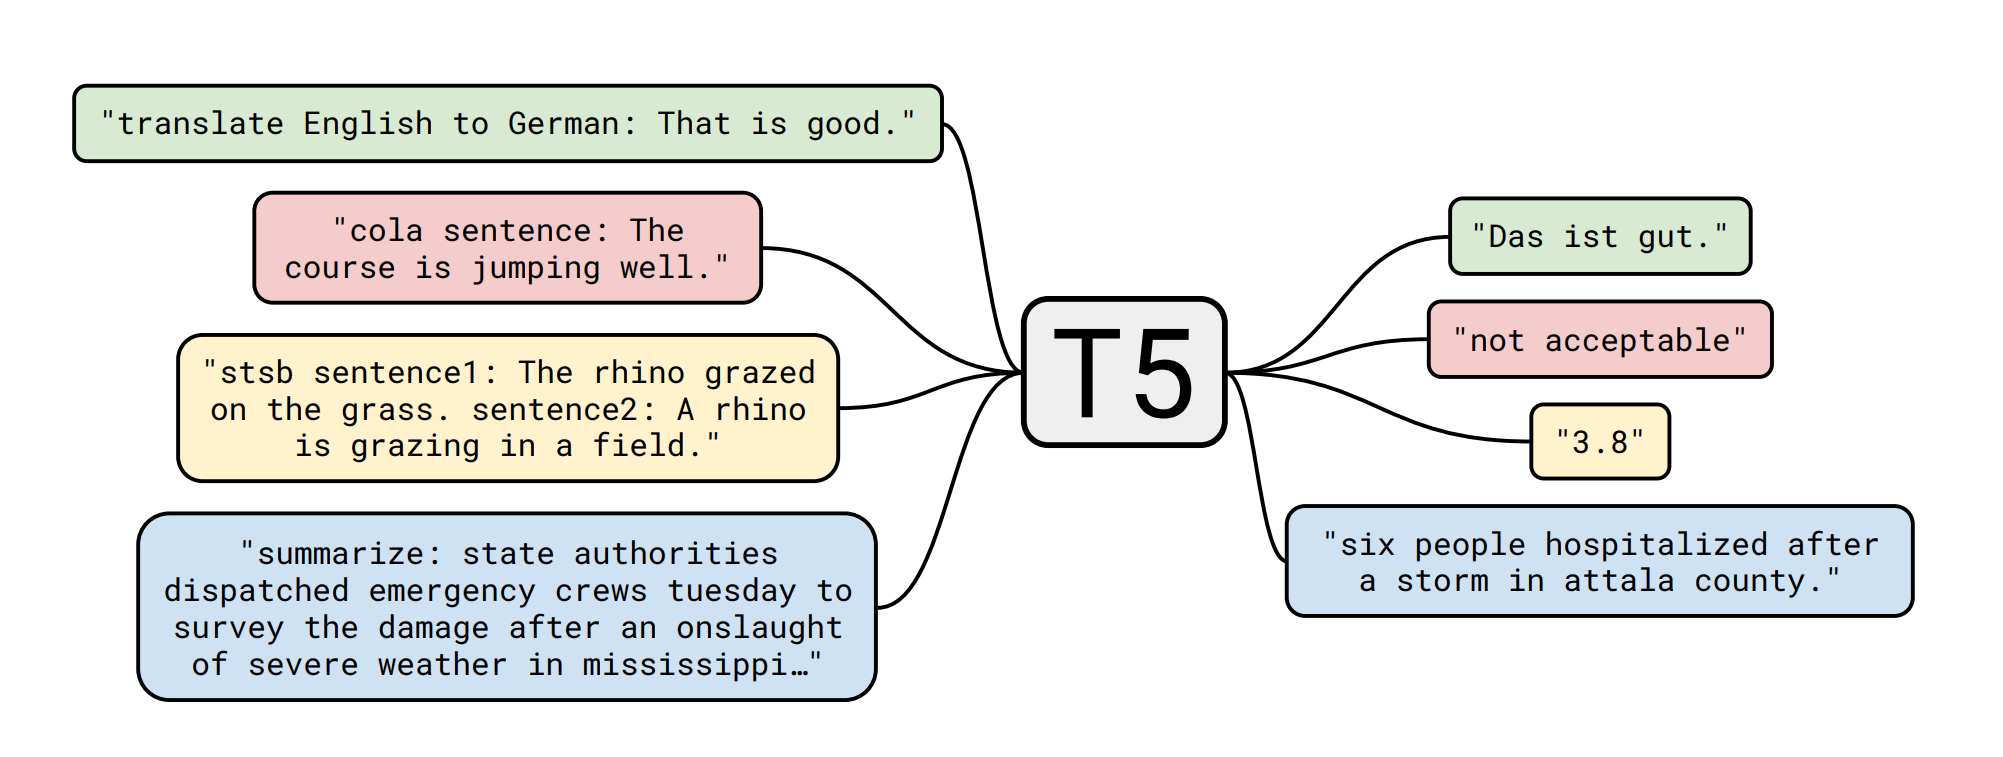

---
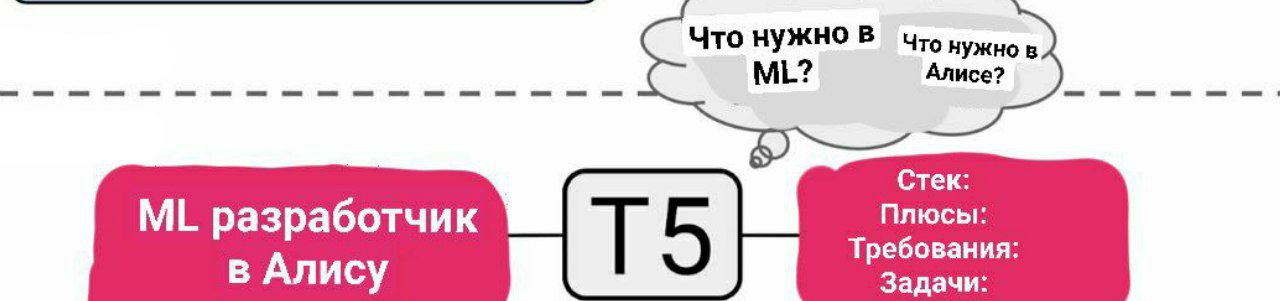

Мы будем использовать RuT5 — идейно то же самое, но на русском языке.

Задачу поставим следующую: по краткой постановке ТЗ сгенерировать развернутое описание вакансии и требований к кандидату. Если RuT5 успешно справится, то мы уволим и оставим голодать целый HR отдел.

In [23]:
!pip install lightning wandb sentencepiece -q


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 10.3 MB/s eta 0:00:00


In [2]:
import os

os.environ["TOKENIZERS_PARALLELISM"] = "false"

In [3]:
import numpy as np
import pytorch_lightning as pl
import torch
import transformers
import wandb
from pytorch_lightning.callbacks import Callback, ModelCheckpoint
from pytorch_lightning.loggers import WandbLogger
from torch.utils.data import DataLoader, Dataset, random_split
from transformers import T5ForConditionalGeneration, T5Tokenizer

### Класс датасета

In [4]:
class JobsDataset(Dataset):
    def __init__(self, data_config):
        self.data_config = data_config

    def __len__(self):
        return len(self.data_config.jobs_dataset)

    def __getitem__(self, item):
        example = self.data_config.jobs_dataset[item]
        title = example["Header"]
        body = (
            example["Description"]
            + "\n"
            + example["Requirements"]
            + "\n"
            + example["Tasks"]
            + "\n"
            + example["Pluses"]
            + "\n"
            + example["Hashtags"]
        )
        return title, body

    def collate(self, examples):
        inputs, targets = list(zip(*examples))
        inputs = self.data_config.tokenizer(inputs, return_tensors="pt", padding=True)[
            "input_ids"
        ]
        targets = self.data_config.tokenizer(
            targets, return_tensors="pt", padding=True
        )["input_ids"]
        return inputs, targets

### Лайтнинг модуль

In [5]:
class JobsGenerator(pl.LightningModule):
    def __init__(self, module_config):
        super().__init__()
        self.module_config = module_config
        self.learning_rate = module_config.learning_rate
        self.tokenizer = T5Tokenizer.from_pretrained(module_config.tokenizer_name)
        self.model = T5ForConditionalGeneration.from_pretrained(
            module_config.tokenizer_name
        )
        self.train_losses = []
        self.val_losses = []

    def training_step(self, batch, batch_idx):
        inp, out = batch
        loss = self.model(inp, labels=out).loss
        self.train_losses.append(loss.item())
        return loss

    def run_model_with_params_for_valtest(self, inp):
        with torch.inference_mode():
            predicted = self.model.generate(
                input_ids=inp, **self.module_config.val_generation_params
            )
        return predicted

    def validation_step(self, batch, batch_idx):
        inp, out = batch
        loss = self.model(inp, labels=out).loss
        self.val_losses.append(loss.item())

        if batch_idx == 0:
            inp_str = self.tokenizer.batch_decode(inp, skip_special_tokens=True)
            out_str = self.tokenizer.batch_decode(out)

            predicted = self.run_model_with_params_for_valtest(inp)
            predicted = self.tokenizer.batch_decode(predicted)

            for i in range(1):  # len(predicted)):
                print("input: ", inp_str[i])
                print(
                    "predicted: ",
                    repr(predicted[i]).replace("<unk>", "\n").replace("<pad>", ""),
                )
                print(
                    "real: ",
                    repr(out_str[i]).replace("<unk>", "\n").replace("<pad>", ""),
                )

        return loss

    def configure_optimizers(self):
        optimizer = torch.optim.AdamW(self.parameters(), lr=self.learning_rate)
        scheduler = transformers.get_cosine_schedule_with_warmup(
            optimizer,
            num_warmup_steps=self.module_config.num_warmup_steps,
            num_training_steps=self.module_config.num_training_steps,
        )
        return (
            [optimizer],
            [
                {
                    "scheduler": scheduler,
                    "interval": "step",
                    "frequency": 1,
                    "reduce_on_plateau": False,
                    "monitor": "val_loss",
                }
            ],
        )

In [6]:
val_generation_params = {
    "max_length": 1024,
    "do_sample": True,
    "num_beams": 5,
    "top_k": 100,
    "top_p": 0.95,
    "num_return_sequences": 1,
    "no_repeat_ngram_size": 7,
    "repetition_penalty": 1.15,
}

In [7]:
# колбек для логирования среднего лосса в конце эпохи
class MyPrintingCallback(Callback):
    def on_validation_end(self, trainer, pl_module):
        wandb.log({"eval_loss": np.mean(pl_module.val_losses)})
        pl_module.val_losses = []

    def on_train_epoch_end(self, trainer, pl_module):
        wandb.log({"train_loss": np.mean(pl_module.train_losses)})
        pl_module.train_losses = []


class DotDict(dict):
    """dot.notation access to dictionary attributes"""

    __getattr__ = dict.get
    __setattr__ = dict.__setitem__
    __delattr__ = dict.__delitem__

In [10]:
pl.seed_everything(42422424)

config = DotDict(
    {
        "jobs_dataset": jobs_dataset,
        "tokenizer_name": "sberbank-ai/ruT5-base",  # тут можно поменять на base (в 3 раза меньше параметов, быстрее учится)
        "model_name_or_path": "sberbank-ai/ruT5-base",
        "train_batch_size": 4,
        "val_batch_size": 4,
        "val_split": 0.1,
        "num_workers": 8,
        "num_epochs": 8,
        "learning_rate": 1e-4,
        "warmup_proportion": 0.15,
        "gradient_clip_val": 1.0,
        "gradient_accumulation_steps": 1,
        "val_check_interval": 1.0,
        "precision": 32,
        "val_generation_params": val_generation_params,
    }
)

INFO:lightning_fabric.utilities.seed:Seed set to 42422424


### Создаем необходимые объекты

In [11]:
# добавим токенайзер в config
config["tokenizer"] = T5Tokenizer.from_pretrained(config.tokenizer_name)

# создадим datasets
converation_dataset = JobsDataset(config)
dataset_size = len(converation_dataset)
val_size = int(config.val_split * dataset_size)
config["val_size"] = val_size
train_size = dataset_size - val_size

# разделим данные на тренировочную и валидационную выборки
train_dataset, val_dataset = random_split(converation_dataset, [train_size, val_size])

# создадим dataloaders
train_loader = DataLoader(
    train_dataset,
    batch_size=config.train_batch_size,
    collate_fn=train_dataset.dataset.collate,
    num_workers=config.num_workers,
    pin_memory=True,
    shuffle=True,
)

val_loader = DataLoader(
    val_dataset,
    batch_size=config.val_batch_size,
    collate_fn=val_dataset.dataset.collate,
    num_workers=config.num_workers,
    pin_memory=False,
    shuffle=False,
)

# добавим количество warmup steps в config
config["num_training_steps"] = len(train_loader) * config.num_epochs
config["num_warmup_steps"] = int(
    config["num_training_steps"] * config["warmup_proportion"]
)

spiece.model:   0%|          | 0.00/1.00M [00:00<?, ?B/s]

config.json:   0%|          | 0.00/1.40k [00:00<?, ?B/s]

You are using the default legacy behaviour of the <class 'transformers.models.t5.tokenization_t5.T5Tokenizer'>. This is expected, and simply means that the `legacy` (previous) behavior will be used so nothing changes for you. If you want to use the new behaviour, set `legacy=False`. This should only be set if you understand what it means, and thouroughly read the reason why this was added as explained in https://github.com/huggingface/transformers/pull/24565


Инициализируем модель и запускаем обучение. Во время обучения логгируем следующее:

1) Описание вакансии

2) Требования или "Если вы ..."

3) Задачи или "Вам предстоит ..."

4) Плюсы или "Будет плюсом если вы..."

5) Хэштеги (#python, #backend и тд)

In [12]:
# инициализируем модель
model = JobsGenerator(config)
config["eos_token_id"] = model.tokenizer.eos_token_id
config["pad_token_id"] = model.tokenizer.pad_token_id

# обучим модель
wandb_logger = WandbLogger(config=config, project="Neural Yandex Jobs")
wandb_logger.watch(model)

checkpoint_callback = ModelCheckpoint(
    dirpath=os.path.join(os.getcwd(), "saved_models", str(wandb.run.name)),
    every_n_epochs=2,
)

printing_callback = MyPrintingCallback()

trainer = pl.Trainer(
    accelerator="gpu",
    devices=[0],
    gradient_clip_val=config.gradient_clip_val,
    max_epochs=config.num_epochs,
    logger=wandb_logger,
    accumulate_grad_batches=config.gradient_accumulation_steps,
    callbacks=[checkpoint_callback, printing_callback],
    val_check_interval=config.val_check_interval,
    precision=config.precision,
    num_sanity_val_steps=0,
)

# если хотим включить автоматическое нахождение LR
### trainer.tune(model, train_loader, val_loader)
trainer.fit(model, train_loader, val_loader)

pytorch_model.bin:   0%|          | 0.00/892M [00:00<?, ?B/s]

<IPython.core.display.Javascript object>

wandb: Logging into wandb.ai. (Learn how to deploy a W&B server locally: https://wandb.me/wandb-server)
wandb: You can find your API key in your browser here: https://wandb.ai/authorize
wandb: Paste an API key from your profile and hit enter, or press ctrl+c to quit:

 ··········


wandb: Appending key for api.wandb.ai to your netrc file: /root/.netrc


wandb: logging graph, to disable use `wandb.watch(log_graph=False)`
INFO:pytorch_lightning.utilities.rank_zero:GPU available: True (cuda), used: True
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:IPU available: False, using: 0 IPUs
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.utilities.rank_zero:`Trainer(val_check_interval=1.0)` was configured so validation will run at the end of the training epoch..
INFO:pytorch_lightning.accelerators.cuda:LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]
INFO:pytorch_lightning.callbacks.model_summary:
  | Name  | Type                       | Params
-----------------------------------------------------
0 | model | T5ForConditionalGeneration | 222 M 
-----------------------------------------------------
222 M     Trainable params
0         Non-trainable params
222 M     Total params
891.614   Total estimated model params siz

Training: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

input:  Ведущий разработчик интерфейсов в «Помощь рядом»
predicted:  ' Наша команда разрабатывает и развивает сервисы Яндекса. 
 владеете Python 
 знаете Python 
 хорошо знаете Python и Python 
 умеете программировать на Python 
 работали с C++ 
 знаете C++ 
 имеете опыт работы с S
 L 
 знаете C++, Python 
 разрабатывали архитектуру Linux 
 знаете C++ и Python</s>'
real:  'Наша команда разрабатывает интерфейсы для социальных проектов Яндекса. Мы работаем над самыми разными проектами: от интересных промо-проектов и конструкторов до сложных приложений, которые взаимодействуют со множеством других сервисов. Команда является центром экспертизы по адаптации сайтов компании для людей с ограниченными возможностями. Будем рады видеть в своих рядах разработчика, которому интересно работать над социальными проектами, используя для этого возможности и технологии большой компании. 
 работали с библиотеками React, Redux и TS 
 знаете платформу Node.js и спецификацию ES6 
 отлично владете JS 
 хорош

Validation: |          | 0/? [00:00<?, ?it/s]

input:  Ведущий разработчик интерфейсов в «Помощь рядом»
predicted:  ' Мы ищем разработчика, который поможет нам улучшить сервисы Яндекс.Плюс. 
 умеете писать код на Python или Python 
 имеете высшее математическое или техническое образование 
 разбираетесь в классических алгоритмах и структурах данных 
 умеете работать с большими объемами данных 
 хорошо знаете C++ 
 разбираетесь в Python 
 работали с PostgreS
 L 
 умеете работать с СУБД 
 имеете опыт разработки на Python 
 бэкенд 
 CPP 
 CPP 
 python</s>'
real:  'Наша команда разрабатывает интерфейсы для социальных проектов Яндекса. Мы работаем над самыми разными проектами: от интересных промо-проектов и конструкторов до сложных приложений, которые взаимодействуют со множеством других сервисов. Команда является центром экспертизы по адаптации сайтов компании для людей с ограниченными возможностями. Будем рады видеть в своих рядах разработчика, которому интересно работать над социальными проектами, используя для этого возможности и те

Validation: |          | 0/? [00:00<?, ?it/s]

input:  Ведущий разработчик интерфейсов в «Помощь рядом»
predicted:  ' Наша команда разрабатывает интерфейсы для сервисов Яндекса и Яндекса. Мы создаем интерфейсы, которые помогают пользователям решать задачи, связанные с созданием интерфейсов. Мы ищем разработчика, который поможет нам улучшить интерфейсы Яндекса. 
 разрабатывали на Python или C++ 
 разбираетесь в классических алгоритмах и структурах данных 
 разбираетесь в Python 
 разбираетесь в алгоритмах и структурах данных и структурах данных 
 имеете опыт разработки на Python 
 работали с высоконагруженными системами 
 работали с большими объемами данных 
 знакомы с Unix-системами 
 разбираетесь в Unix-системах 
 проектировали и разрабатывали высоконагруженные сервисы 
 работали с React, Redux 
 бэкенд 
 CPP 
 CPP 
 python</s>'
real:  'Наша команда разрабатывает интерфейсы для социальных проектов Яндекса. Мы работаем над самыми разными проектами: от интересных промо-проектов и конструкторов до сложных приложений, которые взаимоде

Validation: |          | 0/? [00:00<?, ?it/s]

input:  Ведущий разработчик интерфейсов в «Помощь рядом»
predicted:  ' Яндекс.Плюс — сервис доставки блюд из ресторанов и блюд из ресторанов. Мы ищем разработчика на Python, который поможет нам сделать наш сервис еще лучше. 
 разрабатывали на Python или C++ 
 работали с Node.js 
 знаете классические алгоритмы и структуры данных 
 разбираетесь в алгоритмах и структурах данных 
 имеете опыт разработки на Python 
 работали с React и Redux 
 знакомы с Unix-подобными системами 
 разрабатывали высоконагруженные системы 
 работали с реляционными СУБД 
 фронтенд</s>'
real:  'Наша команда разрабатывает интерфейсы для социальных проектов Яндекса. Мы работаем над самыми разными проектами: от интересных промо-проектов и конструкторов до сложных приложений, которые взаимодействуют со множеством других сервисов. Команда является центром экспертизы по адаптации сайтов компании для людей с ограниченными возможностями. Будем рады видеть в своих рядах разработчика, которому интересно работать над социал

Validation: |          | 0/? [00:00<?, ?it/s]

input:  Ведущий разработчик интерфейсов в «Помощь рядом»
predicted:  ' Мы ищем разработчика интерфейсов, который будет разрабатывать интерфейсы для мобильных приложений Яндекса. 
 уверенно владеете C++ или готовы перейти на Python 
 знаете JavaScript 
 работали с React и Redux 
 работали с React, Redux, Redux 
 знакомы с Unix-подобными системами 
 умеете работать в командной строке *nix 
 имеете опыт разработки на Node.js 
 умеете разбираться в чужом коде 
 проектировать архитектуру сервиса 
 разрабатывали высоконагруженные сервисы 
 фронтенд 
 JS</s>'
real:  'Наша команда разрабатывает интерфейсы для социальных проектов Яндекса. Мы работаем над самыми разными проектами: от интересных промо-проектов и конструкторов до сложных приложений, которые взаимодействуют со множеством других сервисов. Команда является центром экспертизы по адаптации сайтов компании для людей с ограниченными возможностями. Будем рады видеть в своих рядах разработчика, которому интересно работать над социальными п

Validation: |          | 0/? [00:00<?, ?it/s]

input:  Ведущий разработчик интерфейсов в «Помощь рядом»
predicted:  ' Наша команда разрабатывает интерфейсы для пользователей Яндекса. Мы ищем разработчика интерфейсов, который поможет нам сделать наши сервисы еще более удобными и удобными. 
 разрабатывали на Python или C++ 
 работали с Node.js 
 работали с React, Redux, Redux 
 работали с React и Redux 
 знакомы с TypeScript, Node.js, React, Redux 
 умеете работать в командной строке *nix 
 писали тесты 
 фронтенд 
 JS 
 react 
 react</s>'
real:  'Наша команда разрабатывает интерфейсы для социальных проектов Яндекса. Мы работаем над самыми разными проектами: от интересных промо-проектов и конструкторов до сложных приложений, которые взаимодействуют со множеством других сервисов. Команда является центром экспертизы по адаптации сайтов компании для людей с ограниченными возможностями. Будем рады видеть в своих рядах разработчика, которому интересно работать над социальными проектами, используя для этого возможности и технологии большой

Validation: |          | 0/? [00:00<?, ?it/s]

input:  Ведущий разработчик интерфейсов в «Помощь рядом»
predicted:  ' Мы ищем разработчика интерфейсов для интерфейсов Яндекса. 
 работали с Node.js, Node.js 
 работали с React и Redux 
 работали с React, Redux, Redux 
 разрабатывали для Unix или Linux 
 работали с системами контроля версий 
 имеете опыт разработки на React, Redux 
 знаете TypeScript и Redux 
 знакомы с Unix-подобными системами 
 знакомы с Unix shell 
 писали тесты 
 фронтенд 
 JS 
 react 
 react</s>'
real:  'Наша команда разрабатывает интерфейсы для социальных проектов Яндекса. Мы работаем над самыми разными проектами: от интересных промо-проектов и конструкторов до сложных приложений, которые взаимодействуют со множеством других сервисов. Команда является центром экспертизы по адаптации сайтов компании для людей с ограниченными возможностями. Будем рады видеть в своих рядах разработчика, которому интересно работать над социальными проектами, используя для этого возможности и технологии большой компании. 
 работали с

Validation: |          | 0/? [00:00<?, ?it/s]

input:  Ведущий разработчик интерфейсов в «Помощь рядом»
predicted:  ' Мы ищем разработчика интерфейсов, который будет развивать интерфейсы Яндекса. 
 разрабатывали для Unix или Linux 
 работали с Node.js, Node.js, React, Redux 
 работали с React, Redux, Redux 
 разрабатывали на Node.js 
 работали с React и Redux 
 знакомы с Unix-подобными системами 
 знакомы с Unix shell 
 умеете писать код на React, Redux и React 
 знаете TypeScript, Redux 
 фронтенд 
 react 
 react</s>'
real:  'Наша команда разрабатывает интерфейсы для социальных проектов Яндекса. Мы работаем над самыми разными проектами: от интересных промо-проектов и конструкторов до сложных приложений, которые взаимодействуют со множеством других сервисов. Команда является центром экспертизы по адаптации сайтов компании для людей с ограниченными возможностями. Будем рады видеть в своих рядах разработчика, которому интересно работать над социальными проектами, используя для этого возможности и технологии большой компании. 
 работа

INFO:pytorch_lightning.utilities.rank_zero:`Trainer.fit` stopped: `max_epochs=8` reached.
